In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("test.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C


In [4]:
data.shape

(369, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  369 non-null    int64  
 1   Survived     369 non-null    int64  
 2   Pclass       369 non-null    int64  
 3   Name         369 non-null    object 
 4   Sex          369 non-null    object 
 5   Age          294 non-null    float64
 6   SibSp        369 non-null    int64  
 7   Parch        369 non-null    int64  
 8   Ticket       369 non-null    object 
 9   Fare         369 non-null    float64
 10  Cabin        85 non-null     object 
 11  Embarked     368 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             75
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          284
Embarked         1
dtype: int64

In [7]:
data=data.drop(columns='Cabin',axis=1)

In [8]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [9]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [10]:
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)

In [11]:
data.isnull().sum().sum()

0

In [12]:
data['Survived'].value_counts()

0    226
1    143
Name: Survived, dtype: int64

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,185.000000,0.387534,2.336043,29.159014,0.604336,0.384824,32.231198
std,106.665365,0.487849,0.824770,12.889855,1.236045,0.786011,49.227708
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,93.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,185.000000,0.000000,3.000000,29.159014,0.000000,0.000000,14.458300
75%,277.000000,1.000000,3.000000,35.000000,1.000000,0.000000,30.695800
max,369.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [14]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

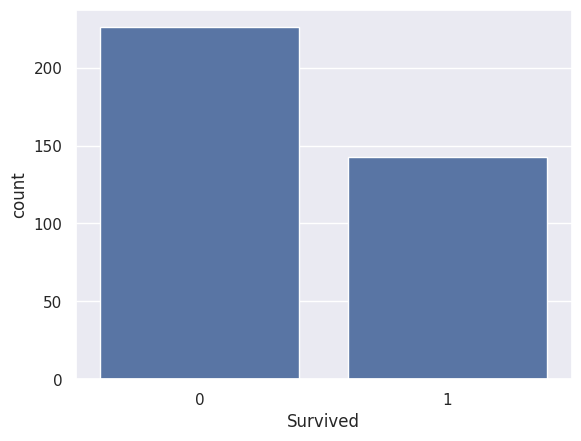

In [15]:
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Sex', ylabel='count'>

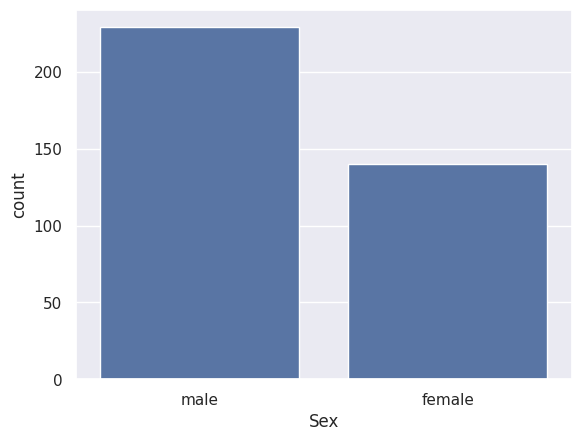

In [16]:
sns.countplot(x='Sex',data=data)

<Axes: xlabel='Sex', ylabel='count'>

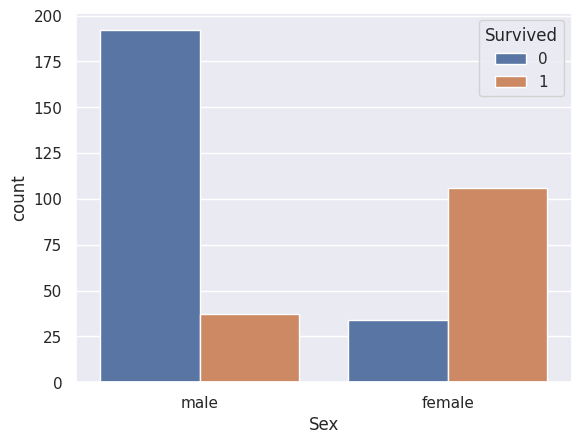

In [17]:
sns.countplot(x='Sex',hue='Survived',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

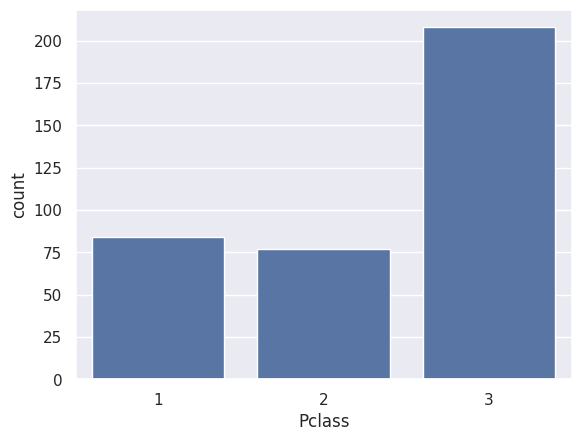

In [18]:
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

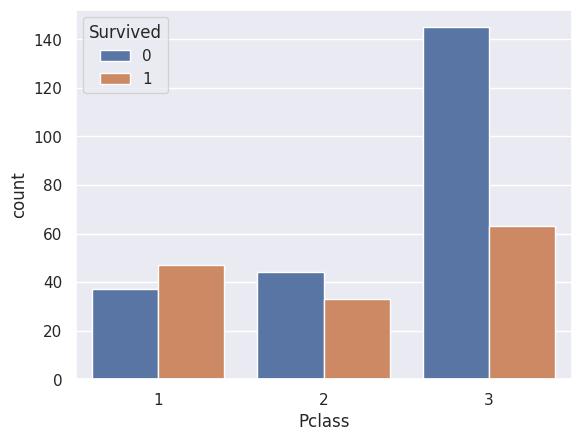

In [19]:
sns.countplot(x='Pclass',hue='Survived',data=data)

In [20]:
data['Sex'].value_counts()

male      229
female    140
Name: Sex, dtype: int64

In [21]:
data['Embarked'].value_counts()

S    261
C     70
Q     38
Name: Embarked, dtype: int64

In [22]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [23]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
364,365,0,3,"O'Brien, Mr. Thomas",0,29.159014,1,0,370365,15.5000,2
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",0,30.000000,0,0,C 7076,7.2500,0
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",1,60.000000,1,0,110813,75.2500,1
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",1,29.159014,0,0,2626,7.2292,1


In [24]:
X=data.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [25]:
Y=data['Survived']

In [26]:
print(X)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
364         0       3    0  29.159014      1      0  15.5000         2
365         0       3    0  30.000000      0      0   7.2500         0
366         1       1    1  60.000000      1      0  75.2500         1
367         1       3    1  29.159014      0      0   7.2292         1
368         1       3    1  29.159014      0      0   7.7500         2

[369 rows x 8 columns]


In [27]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
364    0
365    0
366    1
367    1
368    1
Name: Survived, Length: 369, dtype: int64


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(369, 8) (295, 8) (74, 8)


In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
X_train_prediction=model.predict(X_train)

In [34]:
print(X_train_prediction)

[0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0]


In [35]:
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [36]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  1.0


In [37]:
X_test_prediction=model.predict(X_test)


In [38]:
print(X_test_prediction)

[0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0]


In [39]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [40]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 1.0
